In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [88]:
credit = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")
movie = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

In [89]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [90]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [91]:
movie = movie[["original_title","overview","release_date","revenue","runtime","vote_average","vote_count","popularity",]]
movie.head()

,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,popularity
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,2787965087,162.0,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,961000000,169.0,6.9,4500,139.082615
2,Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,880674609,148.0,6.3,4466,107.376788
3,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,1084939099,165.0,7.6,9106,112.312950
4,John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,284139100,132.0,6.1,2124,43.926995


In [92]:
r = movie["vote_average"]
v = movie["vote_count"]
m = movie["vote_count"].quantile(0.8)
c = movie["vote_average"].mean()

movie["weighted"] = ((r * v) + (c*m))/(v+m)

In [93]:
movie.head()

,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,popularity,weighted
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,2787965087,162.0,7.2,11800,150.437577,7.116845
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,961000000,169.0,6.9,4500,139.082615,6.758257
2,Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,880674609,148.0,6.3,4466,107.376788,6.263305
3,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,1084939099,165.0,7.6,9106,112.312950,7.456523
4,John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,284139100,132.0,6.1,2124,43.926995,6.097567


In [94]:
top_10_movies = movie.sort_values("weighted",ascending = False).iloc[0:10,:]
top_10_movies

,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,popularity,weighted
1881,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,28341469,142.0,8.5,8205,136.747729,8.248353
662,Fight Club,A ticking-time-bomb insomniac and a slippery s...,1999-10-15,100853753,139.0,8.3,9413,146.757391,8.096134
3337,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,245066411,175.0,8.4,5893,143.659698,8.077404
3232,Pulp Fiction,"A burger-loving hit man, his philosophical par...",1994-10-08,213928762,154.0,8.3,8428,121.463076,8.074738
65,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,1004558444,152.0,8.2,12002,187.322927,8.044250
809,Forrest Gump,A man with a low IQ has accomplished great thi...,1994-07-06,677945399,142.0,8.2,7927,138.133331,7.972814
96,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-14,825532764,148.0,8.1,13752,167.583710,7.969290
95,Interstellar,Interstellar chronicles the adventures of a gr...,2014-11-05,675120017,169.0,8.1,10867,724.247784,7.937399
1990,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",1980-05-17,538400000,124.0,8.2,5879,78.517830,7.904757
1818,Schindler's List,The true story of how businessman Oskar Schind...,1993-11-29,321365567,195.0,8.3,4329,104.469351,7.900080


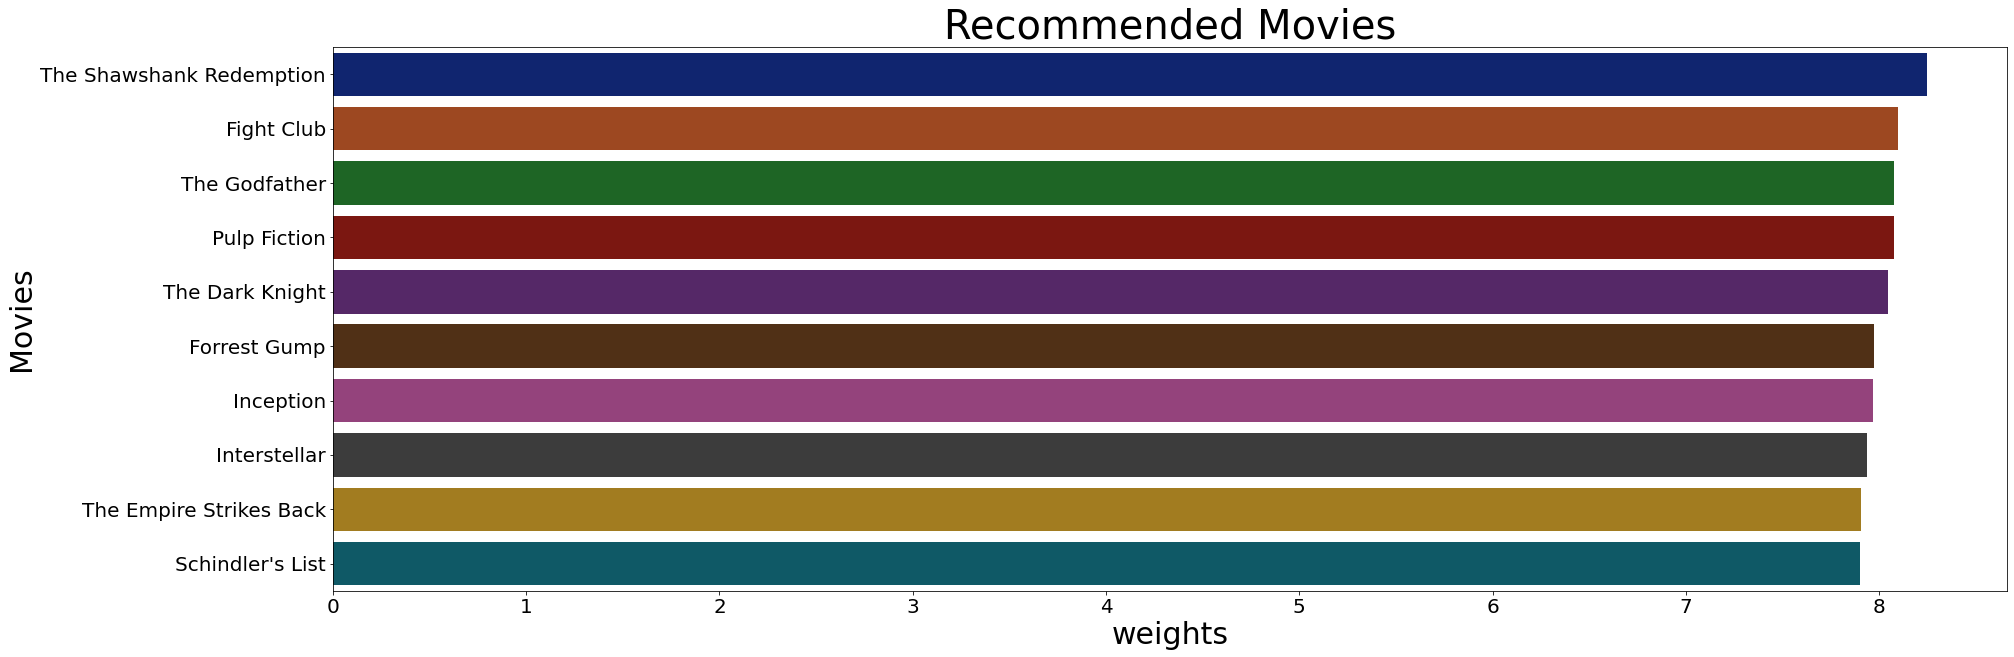

In [95]:
plt.figure(figsize = (30,10))
sns.barplot(x = "weighted",y = "original_title",palette = "dark",data = top_10_movies);
plt.title("Recommended Movies",fontsize = 40);
plt.xlabel("weights",fontsize = 30);
plt.ylabel("Movies",fontsize = 30);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);

In [105]:
std = StandardScaler()
data = pd.DataFrame(std.fit_transform(movie.iloc[:,7:]))
movie["score"] = data[0]*0.5 + data[1]*0.5

In [106]:
movie

,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,popularity,weighted,score
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,2787965087,162.0,7.2,11800,150.437577,7.116845,3.353362
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,961000000,169.0,6.9,4500,139.082615,6.758257,2.653730
2,Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,880674609,148.0,6.3,4466,107.376788,6.263305,1.436060
3,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,1084939099,165.0,7.6,9106,112.312950,7.456523,3.247856
4,John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,284139100,132.0,6.1,2124,43.926995,6.097567,0.197957
...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...,1992-09-04,2040920,81.0,6.6,238,14.269792,6.193262,-0.129074
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,2011-12-26,0,85.0,5.9,5,0.642552,6.091173,-0.491624
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",2013-10-13,0,120.0,7.0,6,1.444476,6.097824,-0.469354
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...,2012-05-03,0,98.0,5.7,7,0.857008,6.089326,-0.490939


In [107]:
top_movie = movie.sort_values("score",ascending = False).iloc[0:10,:]
top_movie

,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,popularity,weighted,score
546,Minions,"Minions Stuart, Kevin and Bob are recruited by...",2015-06-17,1156730962,91.0,6.4,4571,875.581305,6.346682,13.630862
95,Interstellar,Interstellar chronicles the adventures of a gr...,2014-11-05,675120017,169.0,8.1,10867,724.247784,7.937399,13.564341
94,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",2014-07-30,773328629,121.0,7.9,9742,481.098624,7.738202,9.453332
788,Deadpool,Deadpool tells the origin story of former Spec...,2016-02-09,783112979,108.0,7.4,10995,514.569956,7.295221,9.335565
127,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,2015-05-13,378858340,120.0,7.2,9427,434.278564,7.097843,7.786783
28,Jurassic World,Twenty-two years after the events of Jurassic ...,2015-06-09,1513528810,124.0,6.5,8662,418.708552,6.459402,6.614167
199,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",2003-07-09,655011224,143.0,7.5,6985,271.972889,7.330265,5.573677
65,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,1004558444,152.0,8.2,12002,187.322927,8.044250,5.280963
3865,Whiplash,"Under the direction of a ruthless instructor, ...",2014-10-10,13092000,105.0,8.3,4254,192.528841,7.894325,5.144882
96,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-14,825532764,148.0,8.1,13752,167.583710,7.969290,4.861781


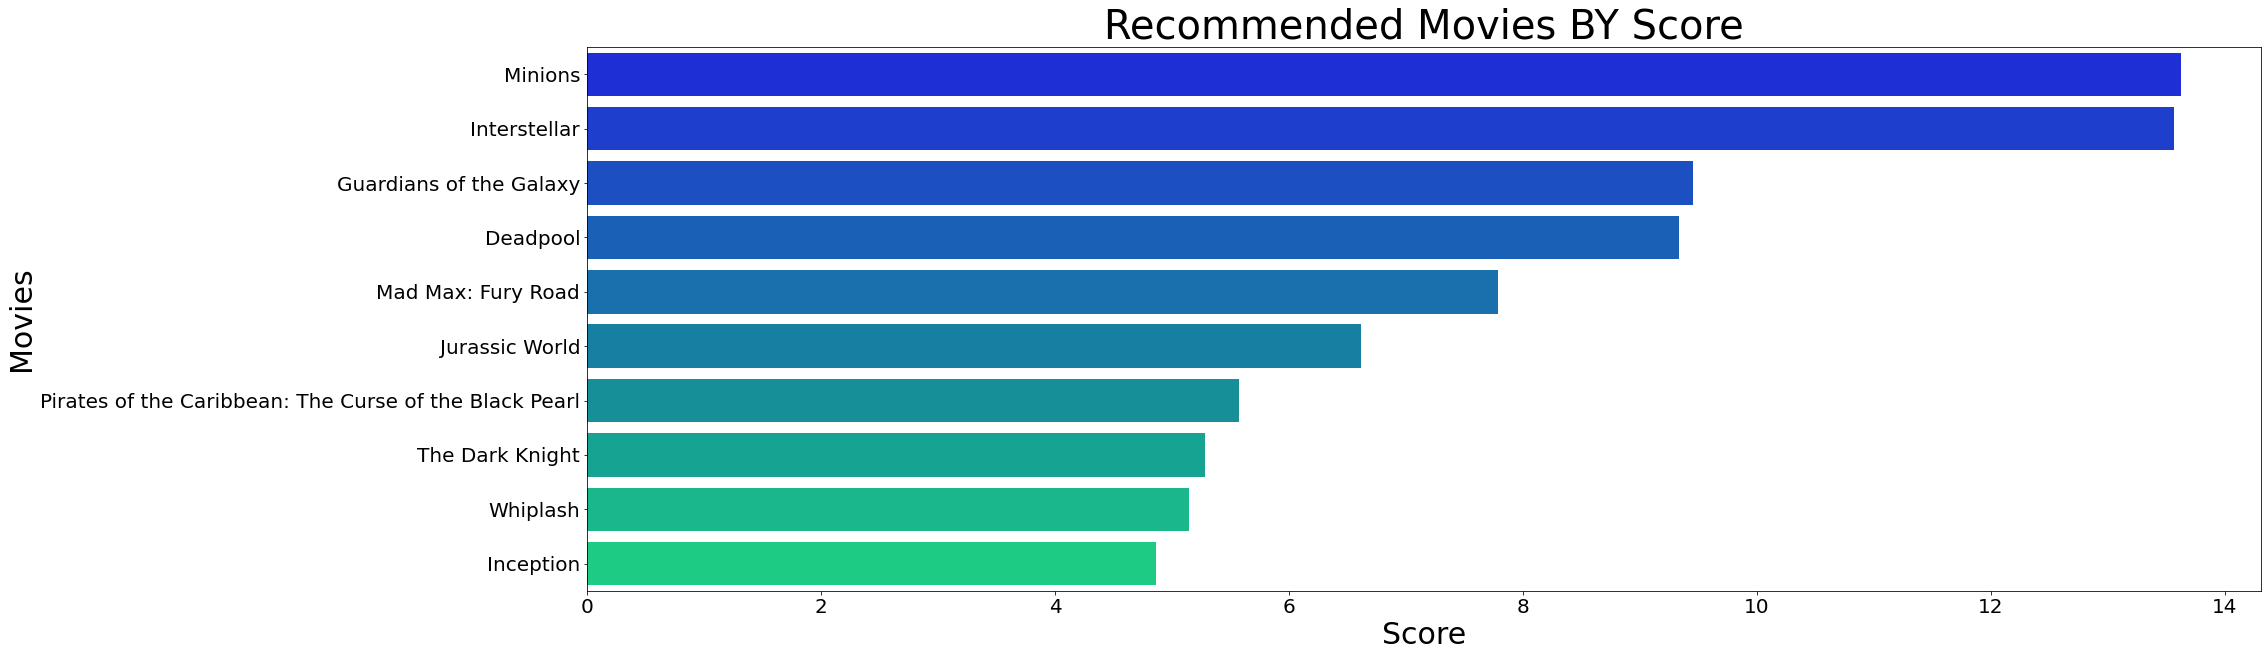

In [109]:
plt.figure(figsize = (30,10))
sns.barplot(x = "score",y = "original_title",palette = "winter",data = top_movie);
plt.title("Recommended Movies By Score",fontsize = 40);
plt.xlabel("Score",fontsize = 30);
plt.ylabel("Movies",fontsize = 30);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);